## Installation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
import gensim
from gensim.models import Word2Vec,KeyedVectors
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

## File Extraction

In [7]:
data = pd.read_csv("questions.csv")

In [15]:
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [11]:
data["is_duplicate"].value_counts()

is_duplicate
0    255045
1    149306
Name: count, dtype: int64

In [13]:
data.dropna(inplace = True)

## Creating the Corpus and Text Preprocessing

In [17]:
corpus = data['question1'].tolist() + data['question2'].tolist()

story = []
for sent in tqdm(corpus):
    story.append(simple_preprocess(sent))

100%|███████████████████████████████| 808696/808696 [00:08<00:00, 100793.20it/s]


#### Corpus is just a list containing all the questions provided in the dataset for further preprocessing

#### Story is the list of all words after Pre-Processing
#### 1) Lowercasing
#### 2) Tokenization
#### 3) Removing Punctuation
#### 4) Removing Short and Long Words
#### 5) Discarding Non-Alphanumeric Characters
#### 6) Word Splitting Based on Whitespace

In [19]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download("stopwords")

stemmer = PorterStemmer()
def process_word_list(word_list):
    meaningful_words = [
        stemmer.stem(word)  # Apply stemming
        for word in word_list
        if word.lower() not in stopwords.words("english")  # Remove stopwords
    ]
    return meaningful_words

cleaned_story = [process_word_list(sublist) for sublist in tqdm(story)]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyaskartikey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|█████████████████████████████████| 808696/808696 [07:09<00:00, 1883.15it/s]


## WORD2VEC

In [21]:
word2vec_model = gensim.models.Word2Vec(window = 5, min_count = 2, vector_size=30)
word2vec_model.build_vocab(cleaned_story)
word2vec_model.train(cleaned_story, 
            total_examples = word2vec_model.corpus_count, 
            epochs = word2vec_model.epochs)

(20499578, 21717615)

In [23]:
data["Ques1_Cleaned"] = cleaned_story[:len(data)]
data["Ques2_Cleaned"] = cleaned_story[len(data):]

In [25]:
sample_data = data.copy() # INITIALLY USED FOR TAKING SAMPLES OUT OF MAIN DATA
sample_data.reset_index(inplace = True, drop = True)

In [27]:
sample_data

,id,qid1,qid2,question1,question2,is_duplicate,Ques1_Cleaned,Ques2_Cleaned
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]"
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[stori, kohinoor, koh, noor, diamond]","[would, happen, indian, govern, stole, kohinoo..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dn]"
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[mental, lone, solv]","[find, remaind, math, math, divid]"
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[one, dissolv, water, quikli, sugar, salt, met...","[fish, would, surviv, salt, water]"
...,...,...,...,...,...,...,...,...
404343,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,"[mani, keyword, racket, program, languag, late...","[mani, keyword, perl, program, languag, latest..."
404344,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1,"[believ, life, death]","[true, life, death]"
404345,404348,789796,789797,What is one coin?,What's this coin?,0,"[one, coin]",[coin]
404346,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,"[approx, annual, cost, live, studi, uic, chica...","[littl, hairfal, problem, want, use, hair, sty..."


## GENERATING CUSTOM FEATURES USING TEXT BLOB
+ AVG WORD LENGTH
+ WORD COUNT
+ AVG SENTENCE LENGTH
+ FOG INDEX
+ COMPLEX WORD COUNT

In [29]:
!pip install textblob

In [31]:
from textblob import TextBlob

def text_analysis(word_list):
    # Join the list of words into a text string
    text = " ".join(word_list)

    # Create a TextBlob object
    blob = TextBlob(text)

    # Sentiment Analysis
    polarity_score = blob.sentiment.polarity
    subjectivity_score = blob.sentiment.subjectivity

    # Word Metrics
    word_count = len(word_list)
    average_word_length = sum(len(word) for word in word_list) / word_count

    # Sentence Metrics
    sentence_count = len(blob.sentences)
    average_sentence_length = word_count / sentence_count

    # FOG Index
    complex_word_count = len([word for word in word_list if len(word) > 3])
    fog_index = 0.4 * (average_sentence_length + complex_word_count / word_count)
    
    return np.array([average_word_length, word_count, average_sentence_length, fog_index, complex_word_count])

## CONVERTING TEXT COLUMN INTO VECTORS

In [33]:
vec1 = np.zeros((len(sample_data), 30))
vec2 = np.zeros((len(sample_data), 30))
other_features = np.zeros((len(sample_data), 10))

for i in tqdm(range(len(sample_data))):
    
    text1 = sample_data["Ques1_Cleaned"][i]
    text2 = sample_data["Ques2_Cleaned"][i]
    
    if len(text1) != 0:
        vec1[i] = (sum([word2vec_model.wv[word] for word in text1 if word in word2vec_model.wv.index_to_key]) / len(text1))
        blob1 = text_analysis(text1)
    else:
        vec1[i] = np.zeros((30,))
        blob1 = np.zeros((5,))
    if len(text2) != 0:
        vec2[i] = (sum([word2vec_model.wv[word] for word in text2 if word in word2vec_model.wv.index_to_key]) / len(text2))
        blob2 = text_analysis(text2)
    else:
        vec2i = np.zeros((30,))
        blob2 = np.zeros((5,))
    other_features[i] = np.concatenate([blob1, blob2])

100%|█████████████████████████████████| 404348/404348 [03:10<00:00, 2121.04it/s]


In [35]:
sample_data = pd.concat([sample_data, 
                        pd.DataFrame(vec1, columns = np.arange(0, 30)),
                        pd.DataFrame(vec2, columns = np.arange(30, 60)),
                        pd.DataFrame(other_features, columns = np.arange(60, 70))], axis = 1)
sample_data

,id,qid1,qid2,question1,question2,is_duplicate,Ques1_Cleaned,Ques2_Cleaned,0,1,...,60,61,62,63,64,65,66,67,68,69
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",-0.792632,1.014682,...,4.857143,7.0,7.0,3.200000,7.0,4.833333,6.0,6.0,2.800000,6.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[stori, kohinoor, koh, noor, diamond]","[would, happen, indian, govern, stole, kohinoo...",-0.005346,-0.540368,...,5.400000,5.0,5.0,2.320000,4.0,5.400000,10.0,10.0,4.360000,9.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dn]",0.868723,0.009957,...,5.500000,6.0,6.0,2.666667,4.0,5.200000,5.0,5.0,2.320000,4.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[mental, lone, solv]","[find, remaind, math, math, divid]",0.971169,-1.965530,...,4.666667,3.0,3.0,1.600000,3.0,4.800000,5.0,5.0,2.400000,5.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[one, dissolv, water, quikli, sugar, salt, met...","[fish, would, surviv, salt, water]",0.556791,-0.654168,...,4.800000,10.0,10.0,4.320000,8.0,4.800000,5.0,5.0,2.400000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404343,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,"[mani, keyword, racket, program, languag, late...","[mani, keyword, perl, program, languag, latest...",0.498051,1.488108,...,6.285714,7.0,7.0,3.200000,7.0,6.000000,7.0,7.0,3.200000,7.0
404344,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1,"[believ, life, death]","[true, life, death]",1.635524,-2.695404,...,5.000000,3.0,3.0,1.600000,3.0,4.333333,3.0,3.0,1.600000,3.0
404345,404348,789796,789797,What is one coin?,What's this coin?,0,"[one, coin]",[coin],0.606906,0.385499,...,3.500000,2.0,2.0,1.000000,1.0,4.000000,1.0,1.0,0.800000,1.0
404346,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,"[approx, annual, cost, live, studi, uic, chica...","[littl, hairfal, problem, want, use, hair, sty...",0.104771,-0.375512,...,5.333333,9.0,9.0,3.955556,8.0,4.692308,13.0,13.0,5.476923,9.0


## OVERSAMPLING

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
xresampled, yresampled = smote.fit_resample(sample_data.iloc[:,8:], sample_data["is_duplicate"])
xresampled.shape, yresampled.shape

((510084, 70), (510084,))

## MODELING

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
xtrain, xtest, ytrain, ytest = train_test_split(xresampled, yresampled, test_size = 0.2)
xtrain.shape, ytrain.shape

((408067, 70), (408067,))

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [43]:
n_estimators = 20
rf_model.set_params(n_estimators=0)  # Initialize with zero trees

for i in tqdm(range(1, n_estimators + 1)):
    rf_model.set_params(n_estimators=i)
    rf_model.fit(xtrain, ytrain)

# Evaluate the model
score = rf_model.score(xtest, ytest)
print(f'Model score: {score}')

100%|███████████████████████████████████████████| 20/20 [14:51<00:00, 44.56s/it]


Model score: 0.8365468500347981


In [45]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [47]:
loaded_rf_model = joblib.load('rf_model.pkl')

## PERFORMANCE ANALYSIS

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

ypred1 = rf_model.predict(xtest)
conf_matrix1 = confusion_matrix(ytest, ypred1)

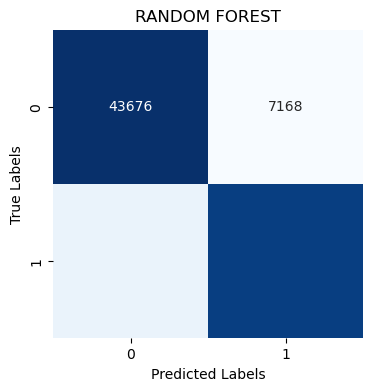

In [51]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('RANDOM FOREST')
plt.show()

In [53]:
class_report1 = pd.DataFrame(classification_report(ytest, ypred1, output_dict = True))
class_report1 

,0,1,accuracy,macro avg,weighted avg
precision,0.821240,0.853217,0.836547,0.837228,0.837280
recall,0.859020,0.814218,0.836547,0.836619,0.836547
f1-score,0.839705,0.833262,0.836547,0.836483,0.836473
support,50844.000000,51173.000000,0.836547,102017.000000,102017.000000


### SAMPLE INFERENCE

In [55]:
# sample1 = 'What are some common examples of solid matter?'
# sample2 = 'What are the most common examples of solid matter?'

l = 13242
sample1 = data["question1"][l]
sample2 = data["question2"][l]
sample1, sample2, data["is_duplicate"][l]

('What are some notable examples of Freudian slips?',
 'Is the Freudian approach to the human condition valid?',
 0)

In [57]:
def inference(sample1, sample2):
    inf_text1 = process_word_list(sample1.split())
    inf_text2 = process_word_list(sample2.split())

    inf_vec1 = np.zeros((1, 30))
    inf_vec2 = np.zeros((1, 30))
    inf_other_features = np.zeros((1, 10))

    if len(inf_text1) != 0:
        inf_vec1[0] = (sum([word2vec_model.wv[word] for word in inf_text1 if word in word2vec_model.wv.index_to_key]) / len(inf_text1))
        inf_blob1 = text_analysis(inf_text1)
    else:
        inf_vec1[0] = np.zeros((30,))
        inf_blob1 = np.zeros((5,))
    if len(inf_text2) != 0:
        inf_vec2[0] = (sum([word2vec_model.wv[word] for word in inf_text2 if word in word2vec_model.wv.index_to_key]) / len(inf_text2))
        inf_blob2 = text_analysis(inf_text2)
    else:
        inf_vec2[0] = np.zeros((30,))
        inf_blob2 = np.zeros((5,))
    inf_other_features[0] = np.concatenate([inf_blob1, inf_blob2])

    inf_data = pd.DataFrame({})
    inf_data = pd.concat([inf_data, 
                            pd.DataFrame(inf_vec1, columns = np.arange(0, 30)),
                            pd.DataFrame(inf_vec2, columns = np.arange(30, 60)),
                            pd.DataFrame(inf_other_features, columns = np.arange(60, 70))], axis = 1)
    return inf_data

inf_data = inference(sample1, sample2)
inf_data

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.602071,-0.172372,-0.21955,0.087717,0.112737,0.049913,0.788473,-0.532041,0.041038,0.155847,...,6.5,4.0,4.0,2.0,4.0,6.6,5.0,5.0,2.4,5.0


In [59]:
out = rf_model.predict(inf_data)

if out == 0:
    print("DIFFERENT")
else:
    print("DUPLICATE")

DIFFERENT


### PREDICTION ON SAMPLE DATA

In [61]:
sam = data.sample(10).iloc[:,3:6]
sam.reset_index(inplace = True, drop = True)
sam

,question1,question2,is_duplicate
0,How can we prepare for the interview?,How can I prepare for interview?,1
1,Is a resting heart rate of 123 bpm too fast?,Is a resting heart rate of 112 bpm dangerous?,0
2,Do Psychopaths have microexpressions?,Do psychopaths have the ability to have micro-...,1
3,What is cams?,What is a CAM?,0
4,"I appear on someone's Instagram ""following"" li...","I appear on someone's Instagram ""following"" li...",1
5,I am Brahmin. My friend is Maratha. He's been ...,What is the exact status of Brahmins in India ...,0
6,Why density of ice is less than water?,Why is ice lighter than water?,1
7,Who are the best dentists in australia?,Do you know any Dentists in Croatia?,0
8,What do Americans think about Donald Trump?,What do you think about Donald Trump in Septem...,1
9,How Indonesia Muslim?,Why is Indonesia Muslim?,1


In [63]:
outs = []
for k in range(len(sam)):
    sample1 = sam["question1"][k]
    sample2 = sam["question2"][k]
    inf_data = inference(sample1, sample2)
    outs.append(rf_model.predict(inf_data)[0])
sam["Predictions"] = outs
sam

,question1,question2,is_duplicate,Predictions
0,How can we prepare for the interview?,How can I prepare for interview?,1,1
1,Is a resting heart rate of 123 bpm too fast?,Is a resting heart rate of 112 bpm dangerous?,0,0
2,Do Psychopaths have microexpressions?,Do psychopaths have the ability to have micro-...,1,0
3,What is cams?,What is a CAM?,0,0
4,"I appear on someone's Instagram ""following"" li...","I appear on someone's Instagram ""following"" li...",1,0
5,I am Brahmin. My friend is Maratha. He's been ...,What is the exact status of Brahmins in India ...,0,1
6,Why density of ice is less than water?,Why is ice lighter than water?,1,0
7,Who are the best dentists in australia?,Do you know any Dentists in Croatia?,0,0
8,What do Americans think about Donald Trump?,What do you think about Donald Trump in Septem...,1,1
9,How Indonesia Muslim?,Why is Indonesia Muslim?,1,0


# RNN - DL APPROACH

### MAKING TOKENIZED SEQUENCES

In [65]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
xresampled_dl, yresampled_dl = ros.fit_resample(data.iloc[:,3:5], data["is_duplicate"])
xresampled_dl.shape, yresampled_dl.shape

((510084, 2), (510084,))

In [67]:
que1 = np.array(xresampled_dl['question1'].tolist())
que2 = np.array(xresampled_dl['question2'].tolist())

docx = []
for i in tqdm(range(len(que1))):
    docx.append(que1[i] + " " + que2[i])

100%|███████████████████████████████| 510084/510084 [00:02<00:00, 187458.02it/s]


In [69]:
lengths = []
for sent in tqdm(docx):
    lengths.append(len(sent.split()))

100%|██████████████████████████████| 510084/510084 [00:00<00:00, 1194766.11it/s]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

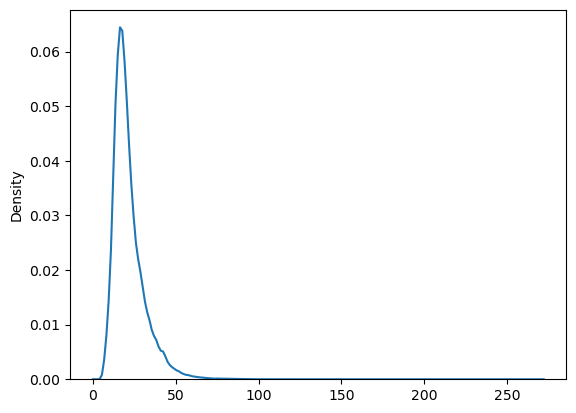

In [71]:
sns.kdeplot(lengths) # TO SEE, AROUND WHICH NUMBER THE MOST SENTENCE LENGHTS LIES

In [73]:
!pip install tensorflow
!pip install keras

In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

tokenizer = Tokenizer(oov_token = "<nothing>")
tokenizer.fit_on_texts(docx)
sequences = tokenizer.texts_to_sequences(docx)
sequences = pad_sequences(sequences, padding = "post", maxlen = 35)

In [77]:
sequences.shape

(510084, 35)

## MODEL ARCHITECTURE

In [79]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(sequences.max()+1, output_dim = 30, input_length = 35))
model.add(tf.keras.layers.SimpleRNN(32, return_sequences = False))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics =["accuracy"])
history = model.fit(sequences, yresampled_dl,
         epochs = 20, batch_size = 1000,
         validation_split = 0.2)

Epoch 1/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7054 - loss: 0.5670 - val_accuracy: 0.6704 - val_loss: 0.6286
Epoch 2/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7922 - loss: 0.4457 - val_accuracy: 0.6112 - val_loss: 0.6744
Epoch 3/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8353 - loss: 0.3668 - val_accuracy: 0.8984 - val_loss: 0.2850
Epoch 4/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8670 - loss: 0.3037 - val_accuracy: 0.9097 - val_loss: 0.2900
Epoch 5/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8919 - loss: 0.2536 - val_accuracy: 0.8927 - val_loss: 0.2880
Epoch 6/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9095 - loss: 0.2164 - val_accuracy: 0.9310 - val_loss: 0.1930
Epoch 7/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9207 - loss: 0.1917 - val_accuracy: 0.9007 - val_loss: 0.2496
Epoch 8/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9306 - loss: 0.1705 - v

In [110]:
train_acc = history.history['accuracy']  # Training accuracy over epochs
val_acc = history.history['val_accuracy']  # Validation accuracy over epochs

# Get the maximum accuracy for training and validation
max_train_acc = max(train_acc)
max_val_acc = max(val_acc)

# Print the results
print(f"Maximum Training Accuracy: {max_train_acc * 100:.2f}%")
print(f"Maximum Validation Accuracy: {max_val_acc * 100:.2f}%")

Maximum Training Accuracy: 97.18%
Maximum Validation Accuracy: 98.32%


In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# max_seq_length = 35
# vocab_size = sequences.max() + 1

# lstm_model = Sequential()
# lstm_model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_seq_length))
# lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
# lstm_model.add(Dropout(0.2))
# lstm_model.add(Dense(1, activation="sigmoid"))
# lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# lstm_model.summary()

max_seq_length = 35
vocab_size = sequences.max() + 1

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_seq_length))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=False)))  # Change to False
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation="sigmoid"))
lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
lstm_model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
history2 = lstm_model.fit(sequences, yresampled_dl,
         epochs = 20, batch_size = 1000,
         validation_split = 0.2)

Epoch 1/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 90s 216ms/step - accuracy: 0.7088 - loss: 0.5607 - val_accuracy: 0.6145 - val_loss: 0.6534
Epoch 2/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 72s 175ms/step - accuracy: 0.7809 - loss: 0.4576 - val_accuracy: 0.6809 - val_loss: 0.5723
Epoch 3/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 75s 183ms/step - accuracy: 0.8073 - loss: 0.4036 - val_accuracy: 0.6724 - val_loss: 0.5806
Epoch 4/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 95s 232ms/step - accuracy: 0.8322 - loss: 0.3544 - val_accuracy: 0.7685 - val_loss: 0.4754
Epoch 5/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 128s 314ms/step - accuracy: 0.8568 - loss: 0.3073 - val_accuracy: 0.8862 - val_loss: 0.3102
Epoch 6/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 77s 185ms/step - accuracy: 0.8743 - loss: 0.2730 - val_accuracy: 0.9077 - val_loss: 0.2615
Epoch 7/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 77s 188ms/step - accuracy: 0.8912 - loss: 0.2411 - val_accuracy: 0.8594 - val_loss: 0.3259
Epoch 8/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 83s 202ms/step - accuracy: 0.9028 - loss: 

In [108]:
train_acc = history2.history['accuracy']  # Training accuracy over epochs
val_acc = history2.history['val_accuracy']  # Validation accuracy over epochs

# Get the maximum accuracy for training and validation
max_train_acc = max(train_acc)
max_val_acc = max(val_acc)

# Print the results
print(f"Maximum Training Accuracy: {max_train_acc * 100:.2f}%")
print(f"Maximum Validation Accuracy: {max_val_acc * 100:.2f}%")

Maximum Training Accuracy: 96.21%
Maximum Validation Accuracy: 97.13%


## INFERENCE

In [86]:
def inference_dl(sam1, sam2):
    docx = [sam1 + " " + sam2]
    sequences = tokenizer.texts_to_sequences(docx)
    sequences = pad_sequences(sequences, padding = "post", maxlen = 35) 
    return sequences

In [92]:
l = 13243
sample1 = data["question1"][l]
sample2 = data["question2"][l]
sample1, sample2, data["is_duplicate"][l]

('Which one is grammatically correct: "an year" or "a year"?',
 'The atmosphere seem to be that of a friendly one. Is this phrase grammatically correct?',
 0)

In [93]:
sample1 = "Who is the most liked character of all time"
sample2 = 'Which character is the most liked one'

In [94]:
inf_data = inference_dl(sample1, sample2)
out = lstm_model.predict(inf_data, verbose = 0)
out = tf.squeeze(out)
out = "DUPLICATE" if np.mean(out) >= 0.5 else "DIFFERENT"
out

'DUPLICATE'

In [95]:
sam = data.sample(10).iloc[:,3:6]
sam.reset_index(inplace = True, drop = True)
sam

,question1,question2,is_duplicate
0,Did South Korea cheat during the 2014 Asian Ga...,Why does North Korea hate South Korea?,0
1,How do you make money with Quora?,How do I make money through Quora?,1
2,What do rich people watch on tv?,What do wealthy people watch on tv?,1
3,What are the top 20 most unscrupulous and corr...,R15 for city rides and touring?,0
4,Are 88 keys really needed to play classical pi...,"If you could play only one piece on piano, wha...",0
5,What are the unsolved mysteries of environment...,Which problems are unsolved in mechanical engi...,0
6,Why is my Kodak printer not detecting the ink ...,My Kodak printer is not detecting the new ink ...,1
7,What happens if you fly a plane through a cloud?,"Non-Indians who have been to India, how did yo...",0
8,Can I drink beer after typhoid?,How can I GET FUNDING TO start CLOTHING FACTOR...,0
9,How vulnerable are baby deer mice? What is the...,How do baby animals abandoned by parents at th...,0


In [96]:
outs = []
for k in range(len(sam)):
    sample1 = sam["question1"][k]
    sample2 = sam["question2"][k]
    inf_data = inference_dl(sample1, sample2)
    out = lstm_model.predict(inf_data, verbose = 0)
    out = tf.squeeze(out)
    out = 1 if np.mean(out) >= 0.5 else 0
    outs.append(out)
sam["Predictions"] = outs
sam

,question1,question2,is_duplicate,Predictions
0,Did South Korea cheat during the 2014 Asian Ga...,Why does North Korea hate South Korea?,0,0
1,How do you make money with Quora?,How do I make money through Quora?,1,1
2,What do rich people watch on tv?,What do wealthy people watch on tv?,1,1
3,What are the top 20 most unscrupulous and corr...,R15 for city rides and touring?,0,0
4,Are 88 keys really needed to play classical pi...,"If you could play only one piece on piano, wha...",0,0
5,What are the unsolved mysteries of environment...,Which problems are unsolved in mechanical engi...,0,0
6,Why is my Kodak printer not detecting the ink ...,My Kodak printer is not detecting the new ink ...,1,1
7,What happens if you fly a plane through a cloud?,"Non-Indians who have been to India, how did yo...",0,0
8,Can I drink beer after typhoid?,How can I GET FUNDING TO start CLOTHING FACTOR...,0,0
9,How vulnerable are baby deer mice? What is the...,How do baby animals abandoned by parents at th...,0,0


## THANK YOU!